<a href="https://colab.research.google.com/github/Mehboobkhan07/Data_Mining_Lab/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_excel("/content/houses_dataset.xlsx")

In [ ]:
df

,beds,baths,size,price
0,3,2.5,2590,795000
1,4,2.0,2240,915000
2,4,3.0,2040,950000
3,4,3.0,3800,1950000
4,2,2.0,1042,650000
5,2,2.0,1190,740000
6,1,1.0,670,460000
7,5,3.5,4510,3150000
8,3,2.5,1520,565000
9,4,2.0,2340,699000


iteration 0: m = 11307.78, c = 20909.38, cost = 746210567516.25
iteration 100: m = 491907.16, c = 909592.36, cost = 52298369023.40
iteration 200: m = 555644.04, c = 1027449.10, cost = 40093878327.25
iteration 300: m = 564096.79, c = 1043079.21, cost = 39879226396.54
iteration 400: m = 565217.79, c = 1045152.07, cost = 39875451109.84
iteration 500: m = 565366.46, c = 1045426.97, cost = 39875384710.30
iteration 600: m = 565386.18, c = 1045463.43, cost = 39875383542.47
iteration 700: m = 565388.79, c = 1045468.26, cost = 39875383521.93
iteration 800: m = 565389.14, c = 1045468.90, cost = 39875383521.57
iteration 900: m = 565389.18, c = 1045468.99, cost = 39875383521.56


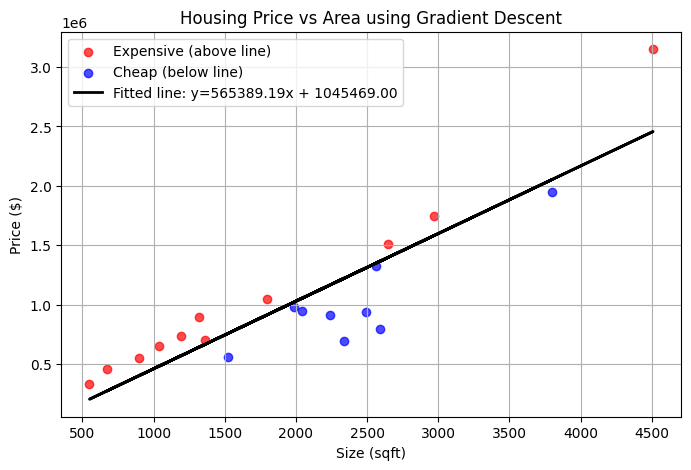

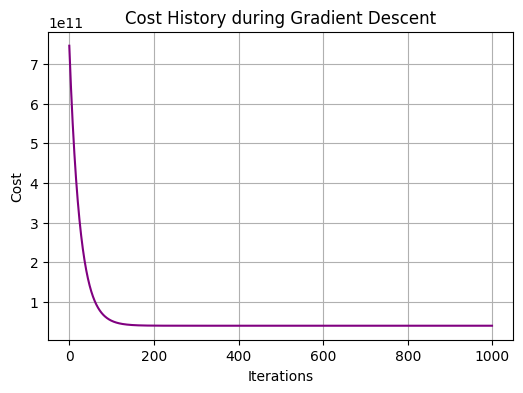

In [ ]:

import matplotlib.pyplot as plt

x = np.array(df['size'], dtype=float)
y = np.array(df['price'], dtype=float)


x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std


m = 0
c = 0
alpha = 0.01
iterations = 1000
n = len(x_norm)

cost_history = []


for i in range(iterations):
    y_pred = m * x_norm + c          # predicted values
    error = y - y_pred
    m_grad = -(2/n) * np.sum(x_norm * error)
    c_grad = -(2/n) * np.sum(error)

    m = m - alpha * m_grad
    c = c - alpha * c_grad

    cost = np.mean(error**2) / 2
    cost_history.append(cost)

    if i % 100 == 0:
        print(f"iteration {i}: m = {m:.2f}, c = {c:.2f}, cost = {cost:.2f}")


y_pred_final = m * x_norm + c


mask_expensive = y > y_pred_final
mask_cheap = y <= y_pred_final


plt.figure(figsize=(8,5))
plt.scatter(x[mask_expensive], y[mask_expensive], color='red', label='Expensive (above line)', alpha=0.7)
plt.scatter(x[mask_cheap], y[mask_cheap], color='blue', label='Cheap (below line)', alpha=0.7)
plt.plot(x, y_pred_final, color='black', linewidth=2, label=f'Fitted line: y={m:.2f}x + {c:.2f}')
plt.xlabel("Size (sqft)")
plt.ylabel("Price ($)")
plt.title("Housing Price vs Area using Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6,4))
plt.plot(cost_history, color='purple')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History during Gradient Descent")
plt.grid(True)
plt.show()
